# Regression
## Batch gradient descent

Ref used: 
> https://towardsdatascience.com/difference-between-batch-gradient-descent-and-stochastic-gradient-descent-1187f1291aa1
> https://stats.stackexchange.com/questions/117556/understanding-gaussian-basis-function-parameters-to-be-used-in-linear-regression
> https://stackoverflow.com/questions/22053050/difference-between-numpy-array-shape-r-1-and-r

In [1]:
import math
import matplotlib.pyplot as plt
import random
from numpy import linalg as LA
from sklearn import cross_validation
import numpy as np
%matplotlib inline 

/Users/luy0a/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Here we assume we are in D-dimensional space and have M data points, and we choose N basis functions. 
Actually now only 1-d version is implemented. 

In [2]:
X_li = []
t_li = []
text = open('regression_x_t.txt', 'r')
lines = text.readlines()
for line in lines:
    listOfLine = line.split(' ')
    X_li.append(float(listOfLine[0]))
    t_li.append(float(listOfLine[1]))
M = len(X_li)
D = 1

In [86]:
X = np.array(X_li)
t = np.array(t_li)

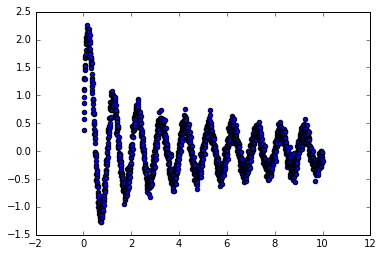

In [5]:
# Observe the data
plt.scatter(X, t)
plt.show()

Thus we choose Gaussian basis functions. For $N = 10$, $s = \frac{1}{N}$ and $\mu_j \in \{0, \dots, 9\}$ 

In [4]:
N = 50
s = 0.3
#mu = np.array([0, 0.4, 0.7,1.1, 1.3,1.6, 1.9, 2.2,2.5, 2.9, 3.2,3.6, 3.9, 4.2,4.5, 4.9, 5.2,5.5, 5.9, 6.2, 6.6, 6.8,7.2, 7.4, 7.9, 8.2, 8.6, 8.8, 9.3, 9.9])
mu=np.linspace(0,10,50)

Define basis function $\phi_j(x)$ for **scalar** x. Returns a scaler. For the case where x is a vector, $\mu_j$ is a vector as well. Here $(x-\mu_j)^2$ becomes 2-norm. 

In [5]:
def phi_j(x, j):
    phix = math.exp(-(x-mu[j])**2/(2*s**2))
    return phix

In [16]:
# vector version of phi
def phi(x):
    phix = np.exp(-1*np.subtract(x, mu)**2/(2*s**2))
    return phix

In [62]:
# matrix version of phi
def phi_mat(X):
    phi_mat = np.zeros((len(X), N))
    for i in range(len(X)):
        phi_mat[i, :] = phi(X[i])
    return phi_mat

Define predict function $y_i$. Takes a scalar data X[i] and returns a scalar. Namely, 
$$y_i(Xi,w)=\sum_{j=1}^N(\phi_j(Xi)\times w[j])=\phi(Xi)^Tw$$

In [7]:
def y_i(Xi, w):
    y = 0
    y = np.dot(phi(Xi), w)
    #for j in range(N):
    #    y = y + phi_j(Xi, j)*w[j]
    return y

In [25]:
# vector version of y
def y(X, w):
    y = np.zeros((len(X),1))
    for i in range(len(X)):
        y[i] =np.dot(phi(X[i]), w)
    return y

In [63]:
def batch_gradient_descent(X, t, w0, alpha, Accuracy):
    diff = 1
    old_error = 1
    errors = []
    w = w0.copy()
    n_iter = 0
    M_test = len(X)
    while old_error > Accuracy and n_iter < 10000:
        n_iter = n_iter + 1
        E_array = np.zeros((M_test, 1))
        # update w
        #r = random.randrange(0, M_test)
        for i in range(N):
            sum_u = 0
            for j in range(M_test):
                sum_u = sum_u + (y_i(X[j], w)-t[j])*phi_j(X[j], i)
            #sum_u = (y_i(X[r], w)-t[r])*phi_j(X[r], i)
            w[i] = w[i]- alpha*sum_u/M_test
            #w[i] = w[i]- alpha*sum_u
            #print '%d iteration w[%d] = %6.2f' %(n_iter,i,w[i])
        #print '%d iteration finished' %n_iter
        for j in range(M_test):
            E_array[j] = y_i(X[j], w)-t[j]
        error = LA.norm(E_array, 2)**2
        diff = np.absolute(old_error-error)
        if n_iter%1000 == 0:
            print error
        errors.append(error)
        old_error = error
    return w, errors

In [54]:
def SGD_gradient_descent(X, t, w0, alpha, Accuracy):
    diff = 1
    old_error = 1
    errors = []
    w = w0.copy()
    n_iter = 0
    M_test = len(X)
    while old_error > Accuracy and n_iter < 10000:
        n_iter = n_iter + 1
        E_array = np.zeros((M_test, 1))
        # update w
        r = random.randrange(0, M_test)
        for i in range(N):
            sum_u = 0
            #for j in range(M_test):
                #sum_u = sum_u + (y_i(X[j], w)-t[j])*phi_j(X[j], i)
            sum_u = (y_i(X[r], w)-t[r])*phi_j(X[r], i)
            #w[i] = w[i]- alpha*sum_u/M_test
            w[i] = w[i]- alpha*sum_u
            #print '%d iteration w[%d] = %6.2f' %(n_iter,i,w[i])
        #print '%d iteration finished' %n_iter
        for j in range(M_test):
            E_array[j] = y_i(X[j], w)-t[j]
        error = LA.norm(E_array, 2)**2
        diff = np.absolute(old_error-error)
        if n_iter%1000 == 0:
            print error
        errors.append(error)
        old_error = error
    return w, errors

In [91]:
def SGD_gradient_descent_matrixform(X, t, w0, alpha, Accuracy):
    diff = 1
    old_error = 1
    errors = []
    w = w0.copy()
    n_iter = 0
    M_test = len(X)
    tr = t.reshape(M_test,1)
    while old_error > Accuracy and n_iter < 10000:
        n_iter = n_iter + 1
        E_array = np.zeros((M_test, 1))
        
        # update w
        r = random.randrange(0, M_test)
        w = np.subtract(w, alpha*(y_i(X[r], w)-t[r])*phi(X[r]))
        E_array = np.subtract(y(X, w), tr)
        error = LA.norm(E_array, 2)**2
        diff = np.absolute(old_error-error)
        if n_iter%1000 == 0:
            print error
        errors.append(error)
        old_error = error
    return w, errors

In [126]:
def batch_gradient_descent_matrixform(X, t, w0, alpha, Accuracy):
    diff = 1
    old_error = 1
    errors = []
    w = w0.copy()
    n_iter = 0
    M_test = len(X)
    tr = t.reshape(M_test,1)
    while old_error > Accuracy and n_iter < 10000:
        n_iter = n_iter + 1
        E_array = np.zeros((M_test, 1))
        # update w
        w = w.reshape(N,1)
        w = np.subtract(w, alpha*np.dot(np.transpose(phi_mat(X)), np.subtract(y(X, w), tr))/M_test)
        E_array = np.subtract(y(X, w), tr)
        error = LA.norm(E_array, 2)**2
        diff = np.absolute(old_error-error)
        if n_iter%1000 == 0:
            print error
        errors.append(error)
        old_error = error
    return w, errors

Prepare test data

In [11]:
xTrain, xTest, tTrain, tTest = cross_validation.train_test_split(X, t, 
                                                                 test_size=0.3, random_state = 0)

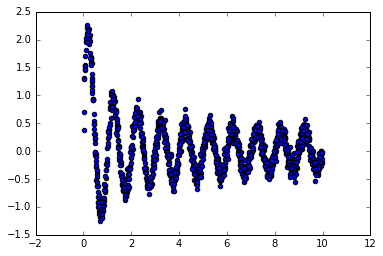

In [155]:
plt.scatter(xTrain, tTrain)
plt.show()

In [12]:
w0 = np.array([0.5 for col in range(N)])

Compute for batch method, plots are down

In [233]:
w, errors = batch_gradient_descent(xTrain, tTrain, w0, 0.1, 0.01)

116.417108111
77.3830485947
55.8452037313
44.9395060719
36.6881140605
31.01705151
27.5601811224
25.7537471576
25.3599509536
23.6646292363


In [128]:
w1, errors1 = batch_gradient_descent(xTrain, tTrain, w0, 0.1, 0.01)

KeyboardInterrupt: 

In [127]:
wm, errorsm = batch_gradient_descent_matrixform(xTrain, tTrain, w0, 0.1, 0.01)

61.5655421007


KeyboardInterrupt: 

SGD experiments

In [67]:
w_sgd, errors_sgd = SGD_gradient_descent(xTrain, tTrain, w0, 0.1, 0.01)

KeyboardInterrupt: 

In [56]:
w_sgd

array([ 0.10481164,  1.7639974 ,  0.91089599, -1.3067777 , -1.45016537,
        0.45556523,  1.5178252 ,  0.40866669, -1.07843905, -0.94634933,
        0.42775983,  1.05823191,  0.17019506, -0.87563312, -0.64999391,
        0.39959315,  0.7893258 ,  0.0850457 , -0.71086988, -0.5022599 ,
        0.42977216,  0.73534704,  0.02705999, -0.68158297, -0.40536361,
        0.46537241,  0.66001962, -0.12472352, -0.72571751, -0.26566649,
        0.50662516,  0.50588076, -0.16502044, -0.58434554, -0.23363914,
        0.42218022,  0.49471692, -0.14827249, -0.6028339 , -0.17251941,
        0.51855667,  0.43253979, -0.28028244, -0.57022685,  0.01782193,
        0.5512873 ,  0.17597205, -0.41245022, -0.29267636,  0.21071396])

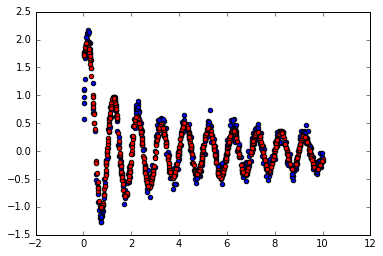

In [57]:
tPredit = []
sizeTest = len(tTest)
for i in range(sizeTest):
    tP = y_i(xTest[i], w_sgd)
    tPredit.append(tP)
plt.scatter(xTest, tTest)
plt.scatter(xTest, tPredit, c='red')
plt.show()

In [49]:
w_sgdm, errors_sgdm = SGD_gradient_descent_matrixform(xTrain, tTrain, w0, 0.1, 0.01)

73.8297427437
36.7683225617
30.947128412
25.303714071
23.8667335111
25.6037780392
24.748796316
22.4063728041
23.6734015754
21.1696124609


In [53]:
w_sgdm

array([ 0.21692525,  1.61393432,  0.95979974, -1.23995633, -1.53433831,
        0.44510265,  1.54608509,  0.36645183, -1.11590191, -0.90345942,
        0.4902934 ,  1.11565569,  0.22103053, -0.85437045, -0.64141867,
        0.4233979 ,  0.81345204,  0.08425346, -0.73097994, -0.54198261,
        0.38762676,  0.73107081,  0.00384701, -0.71791104, -0.40650683,
        0.47155799,  0.65832328, -0.10316552, -0.68217455, -0.23424342,
        0.5437196 ,  0.52297522, -0.20735516, -0.61080898, -0.18888928,
        0.46059951,  0.47791129, -0.15541332, -0.56050476, -0.14980035,
        0.49591996,  0.4430643 , -0.24469427, -0.57029139, -0.0175518 ,
        0.56740762,  0.24451245, -0.41276977, -0.3362684 ,  0.27911377])

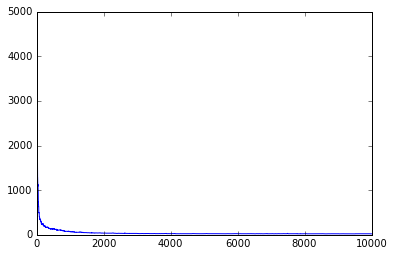

In [50]:
plt.plot(errors_sgdm)
plt.show()

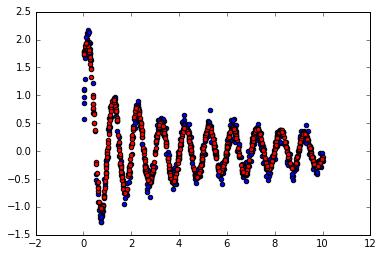

In [51]:
tPredit = []
sizeTest = len(tTest)
for i in range(sizeTest):
    tP = y_i(xTest[i], w_sgdm)
    tPredit.append(tP)
plt.scatter(xTest, tTest)
plt.scatter(xTest, tPredit, c='red')
plt.show()

Plots and results for Batch method

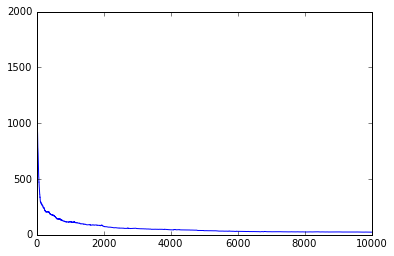

In [234]:
plt.plot(errors)
plt.show()

In [235]:
w

array([ 0.99534351,  2.09848576, -2.80285788,  0.53702203,  1.69367595,
       -1.41577474, -0.69291768,  1.57300803, -0.46630142, -1.17721426,
        1.555854  , -0.54886305, -0.77591072,  1.20623286, -0.22782604,
       -1.04931513,  1.36544476, -0.43749667, -0.7589755 ,  1.0744661 ,
       -0.14715194, -0.75784534,  1.00986113, -0.38095885, -0.77737975,
        1.0498133 , -0.46287037, -0.1396969 ,  0.33911788, -0.34426424,
        0.5       ,  0.5       ,  0.5       ,  0.5       ,  0.5       ,
        0.5       ,  0.5       ,  0.5       ,  0.5       ,  0.5       ,
        0.5       ,  0.5       ,  0.5       ,  0.5       ,  0.5       ,
        0.5       ,  0.5       ,  0.5       ,  0.5       ,  0.5       ])

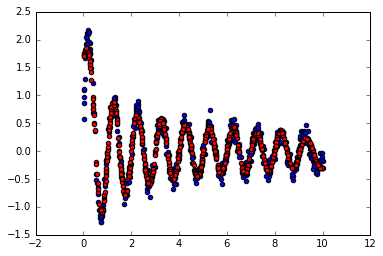

In [236]:
tPredit = []
sizeTest = len(tTest)
for i in range(sizeTest):
    tP = y_i(xTest[i], w)
    tPredit.append(tP)
plt.scatter(xTest, tTest)
plt.scatter(xTest, tPredit, c='red')
plt.show()

## One-step solution for minimizing sum-of-square error

In [55]:
Phi = [[0 for col in range(N)] for row in range(M)]
for i in range(M):
    for j in range(N):
        Phi[i][j] = phi_j(X[i], j)

In [56]:
mPhi = np.array(Phi)
mt = np.array(t)
ww = LA.solve(np.dot( np.transpose(mPhi),mPhi), np.dot( np.transpose(mt), mPhi))

In [57]:
ww

array([ 2.39894466, -1.05473125,  1.0196497 , -1.65359444,  1.62795492,
       -1.39262148,  1.34890669, -1.21517161,  1.19381779, -1.06981159,
        1.04895218, -0.95488251,  0.98296051, -0.52785622,  0.57238173,
       -1.00581061,  0.94395534, -0.52768104,  0.46353641, -0.41308544])

In [58]:
tw = np.array(w)
tw-ww

array([-0.39894466,  0.05473125, -0.0196497 ,  1.65359444, -1.62795492,
        1.39262148, -1.34890669,  1.21517161, -1.19381779,  1.06981159,
       -1.04895218,  0.95488251, -0.98296051,  0.52785622, -0.57238173,
        1.00581061, -0.94395534,  0.52768104, -0.46353641,  0.41308544])

From the result we can see two w got from different method are very near. 

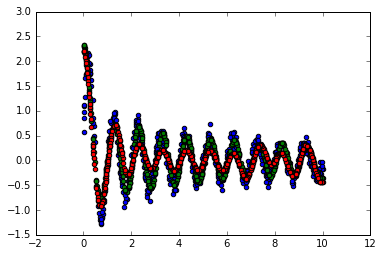

In [134]:
tPredit = []
sizeTest = len(tTest)
for i in range(sizeTest):
    tP = y_i(xTest[i], ww)
    tPredit.append(tP)
plt.scatter(xTest, tTest)
plt.scatter(xTest, tPredit, c='green')

tPredit1 = []
sizeTest = len(tTest)
for i in range(sizeTest):
    tP = y_i(xTest[i], w)
    tPredit1.append(tP)
plt.scatter(xTest, tPredit1, c='red')

plt.show()

The result is similar to the result obtained in (1). 

## Neural Network for Regression
Use MLPRegressor in sklearn

In [314]:
M_Train = len(tTrain)
tPhi = [[0 for col in range(N)] for row in range(M_Train)]
for i in range(M_Train):
    for j in range(N):
        tPhi[i][j] = phi(xTrain[i], j)
        
mtPhi = np.array(tPhi)
mtt = np.array(tTrain)

In [316]:
from sklearn.neural_network import MLPRegressor
clf = MLPRegressor(alpha=0.001,hidden_layer_sizes=500,max_iter=1000) 
clf.fit( mtPhi, mtt) 
print clf.score( mtPhi, mtt) 
#print clf.score( np.transpose(mPhi), np.array(tTest))

0.857331446324


In [320]:
# validate
M_Test = len(tTest)
TPhi = [[0 for col in range(N)] for row in range(M_Test)]
for i in range(M_Test):
    for j in range(N):
        TPhi[i][j] = phi(xTest[i], j)
        
mTPhi = np.array(TPhi)
mTt = np.array(tTest)
print clf.score( mTPhi, mTt)

0.836835495818


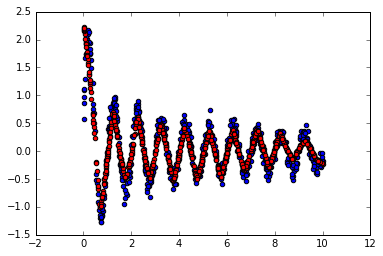

In [322]:
plt.scatter(xTest, tTest)
plt.scatter(xTest, clf.predict(mTPhi), c='red')
plt.show()

From the above cross-validated result and plot, we can see that neural network outperformed the previous predictors. 

## Apply neural network on a non-linear regression problem

In [346]:
X=[]
lX = []
t = []
text = open('Reg_Train.txt', 'r')
lines = text.readlines()
for line in lines:
    listOfLine = line.split(' ')
    for i in range(18):
        lX.append(float(listOfLine[i]))
    X.append(lX)
    t.append(float(listOfLine[-1]))

In [347]:
mX = np.array(X)
mt = np.array(t)

In [349]:
clf = MLPRegressor(alpha=0.01) 
clf.fit( mX, mt) 
print clf.score( mX, mt) 

-0.00126059127954


From the result, it's accurate. 

In [325]:
X_t = []
t_t = []
text_t = open('Reg_Test.txt', 'r')
lines_t = text_t.readlines()
for line in lines_t:
    listOfLine = line.split(' ')
    for i in range(18):
        X_t.append(float(listOfLine[i]))
    t_t.append(float(listOfLine[-1]))

In [330]:
mX_t = np.array(X_t)
mt_t = np.array(t_t)